## 神奇寶貝範例
https://www.kaggle.com/typewind/draw-a-radar-chart-with-python-in-a-simple-way
https://www.itread01.com/content/1541867890.html (先用這個改改看)

In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv("./data/Pokemon.csv")
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [2]:
def Radar_Chart(numeric_columns_list, value_list, name):
    
    #標籤  'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed'
    labels = np.array(numeric_columns_list)
    
    #資料個數
    dataLenth = len(numeric_columns_list)
    
    #資料
    data = np.array( value_list )

    angles = np.linspace(0, 2*np.pi, dataLenth, endpoint=False)
    data = np.concatenate((data, [data[0]])) # 閉合 # #將資料結合起來
    angles = np.concatenate((angles, [angles[0]])) # 閉合

    fig = plt.figure()
    ax = fig.add_subplot(121, polar=True)# polar引數！！代表畫圓形！！！！
    
    #111代表總行數總列數位置
    ax.plot(angles, data, 'bo-', linewidth=1)# 畫線四個引數為x,y,標記和顏色，閒的寬度
    ax.fill(angles, data, facecolor='r', alpha=0.1)# 填充顏色和透明度
    ax.set_thetagrids(angles * 180/np.pi, labels, fontproperties="SimHei")
    ax.set_title(name, va='baseline', fontproperties="SimHei")
    ax.set_rlim(0,5)
    ax.grid(True)
    plt.show()

In [3]:
numeric_columns_list = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']

for col in numeric_columns_list:
    
    # 算 z-score
    df[col] = (df[col]-df[col].mean())/df[col].std()
    
    # 依據每個欄位最大最小值，切成6等份
    cut_rules = np.linspace(min(df[col]), max(df[col]), 6)
    df[col] = pd.cut(df[col], bins = cut_rules, labels = [1,2,3,4,5], include_lowest = True )
    
# 全部平均值
#value_[float(v) for v in df[numeric_columns_list].mean()]

findfont: Font family ['SimHei'] not found. Falling back to DejaVu Sans.


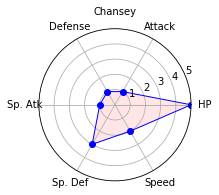

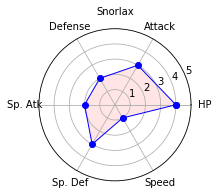

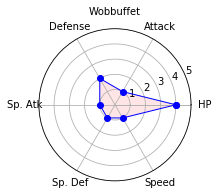

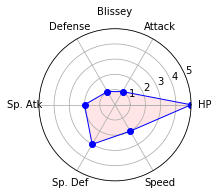

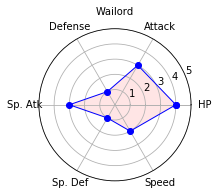

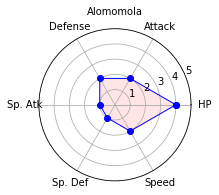

In [4]:
for index in list(df.index):
    name = df.loc[index,'Name']
    value_list = list(df.loc[index, numeric_columns_list])
    
    if value_list[0] >= 4: # 找 HP > 4 的神奇寶貝
        Radar_Chart(numeric_columns_list, value_list, name)
        